In [4]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [5]:
NW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#7 NW1.csv.csv")
NW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#8 NW2.csv.csv")
NW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#9 NW3.csv.csv")
NW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#10 NW4.csv.csv")
NW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test#11 NW5.csv.csv")


In [6]:
#Loading the corresponding force data
force_NW1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#7 NW1 force.log" , delimiter = "\t")
force_NW2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#8 NW2  force.log" , delimiter = "\t")
force_NW3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#9 NW3  force.log" , delimiter = "\t")
force_NW4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#10 NW4  force.log" , delimiter = "\t")
force_NW5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#11 NW5  force.log" , delimiter = "\t")

In [7]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NW1 = force_NW1["Time"]
x_force_NW2 = force_NW2["Time"]
x_force_NW3 = force_NW3["Time"]
x_force_NW4 = force_NW4["Time"]
x_force_NW5 = force_NW5["Time"]

#force
Load_NW1 = force_NW1["Load"]
Load_NW2 = force_NW2["Load"]
Load_NW3 = force_NW3["Load"]
Load_NW4 = force_NW4["Load"]
Load_NW5 = force_NW5["Load"]

# plt.plot(x_force_NW1,Load_NW1,color = 'green', label = 'force data NW1 test #2' )
# plt.plot(x_force_NW2,Load_NW2,color = 'blue', label = 'force data NW2 test #2' )
# plt.plot(x_force_NW3,Load_NW3,color = 'yellow', label = 'force data NW3 test #2' )
# plt.plot(x_force_NW4,Load_NW4,color = 'red', label = 'force data NW4 test #2' )
# plt.plot(x_force_NW5,Load_NW5,color = 'brown', label = 'force data NW5 test #2' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for NW1


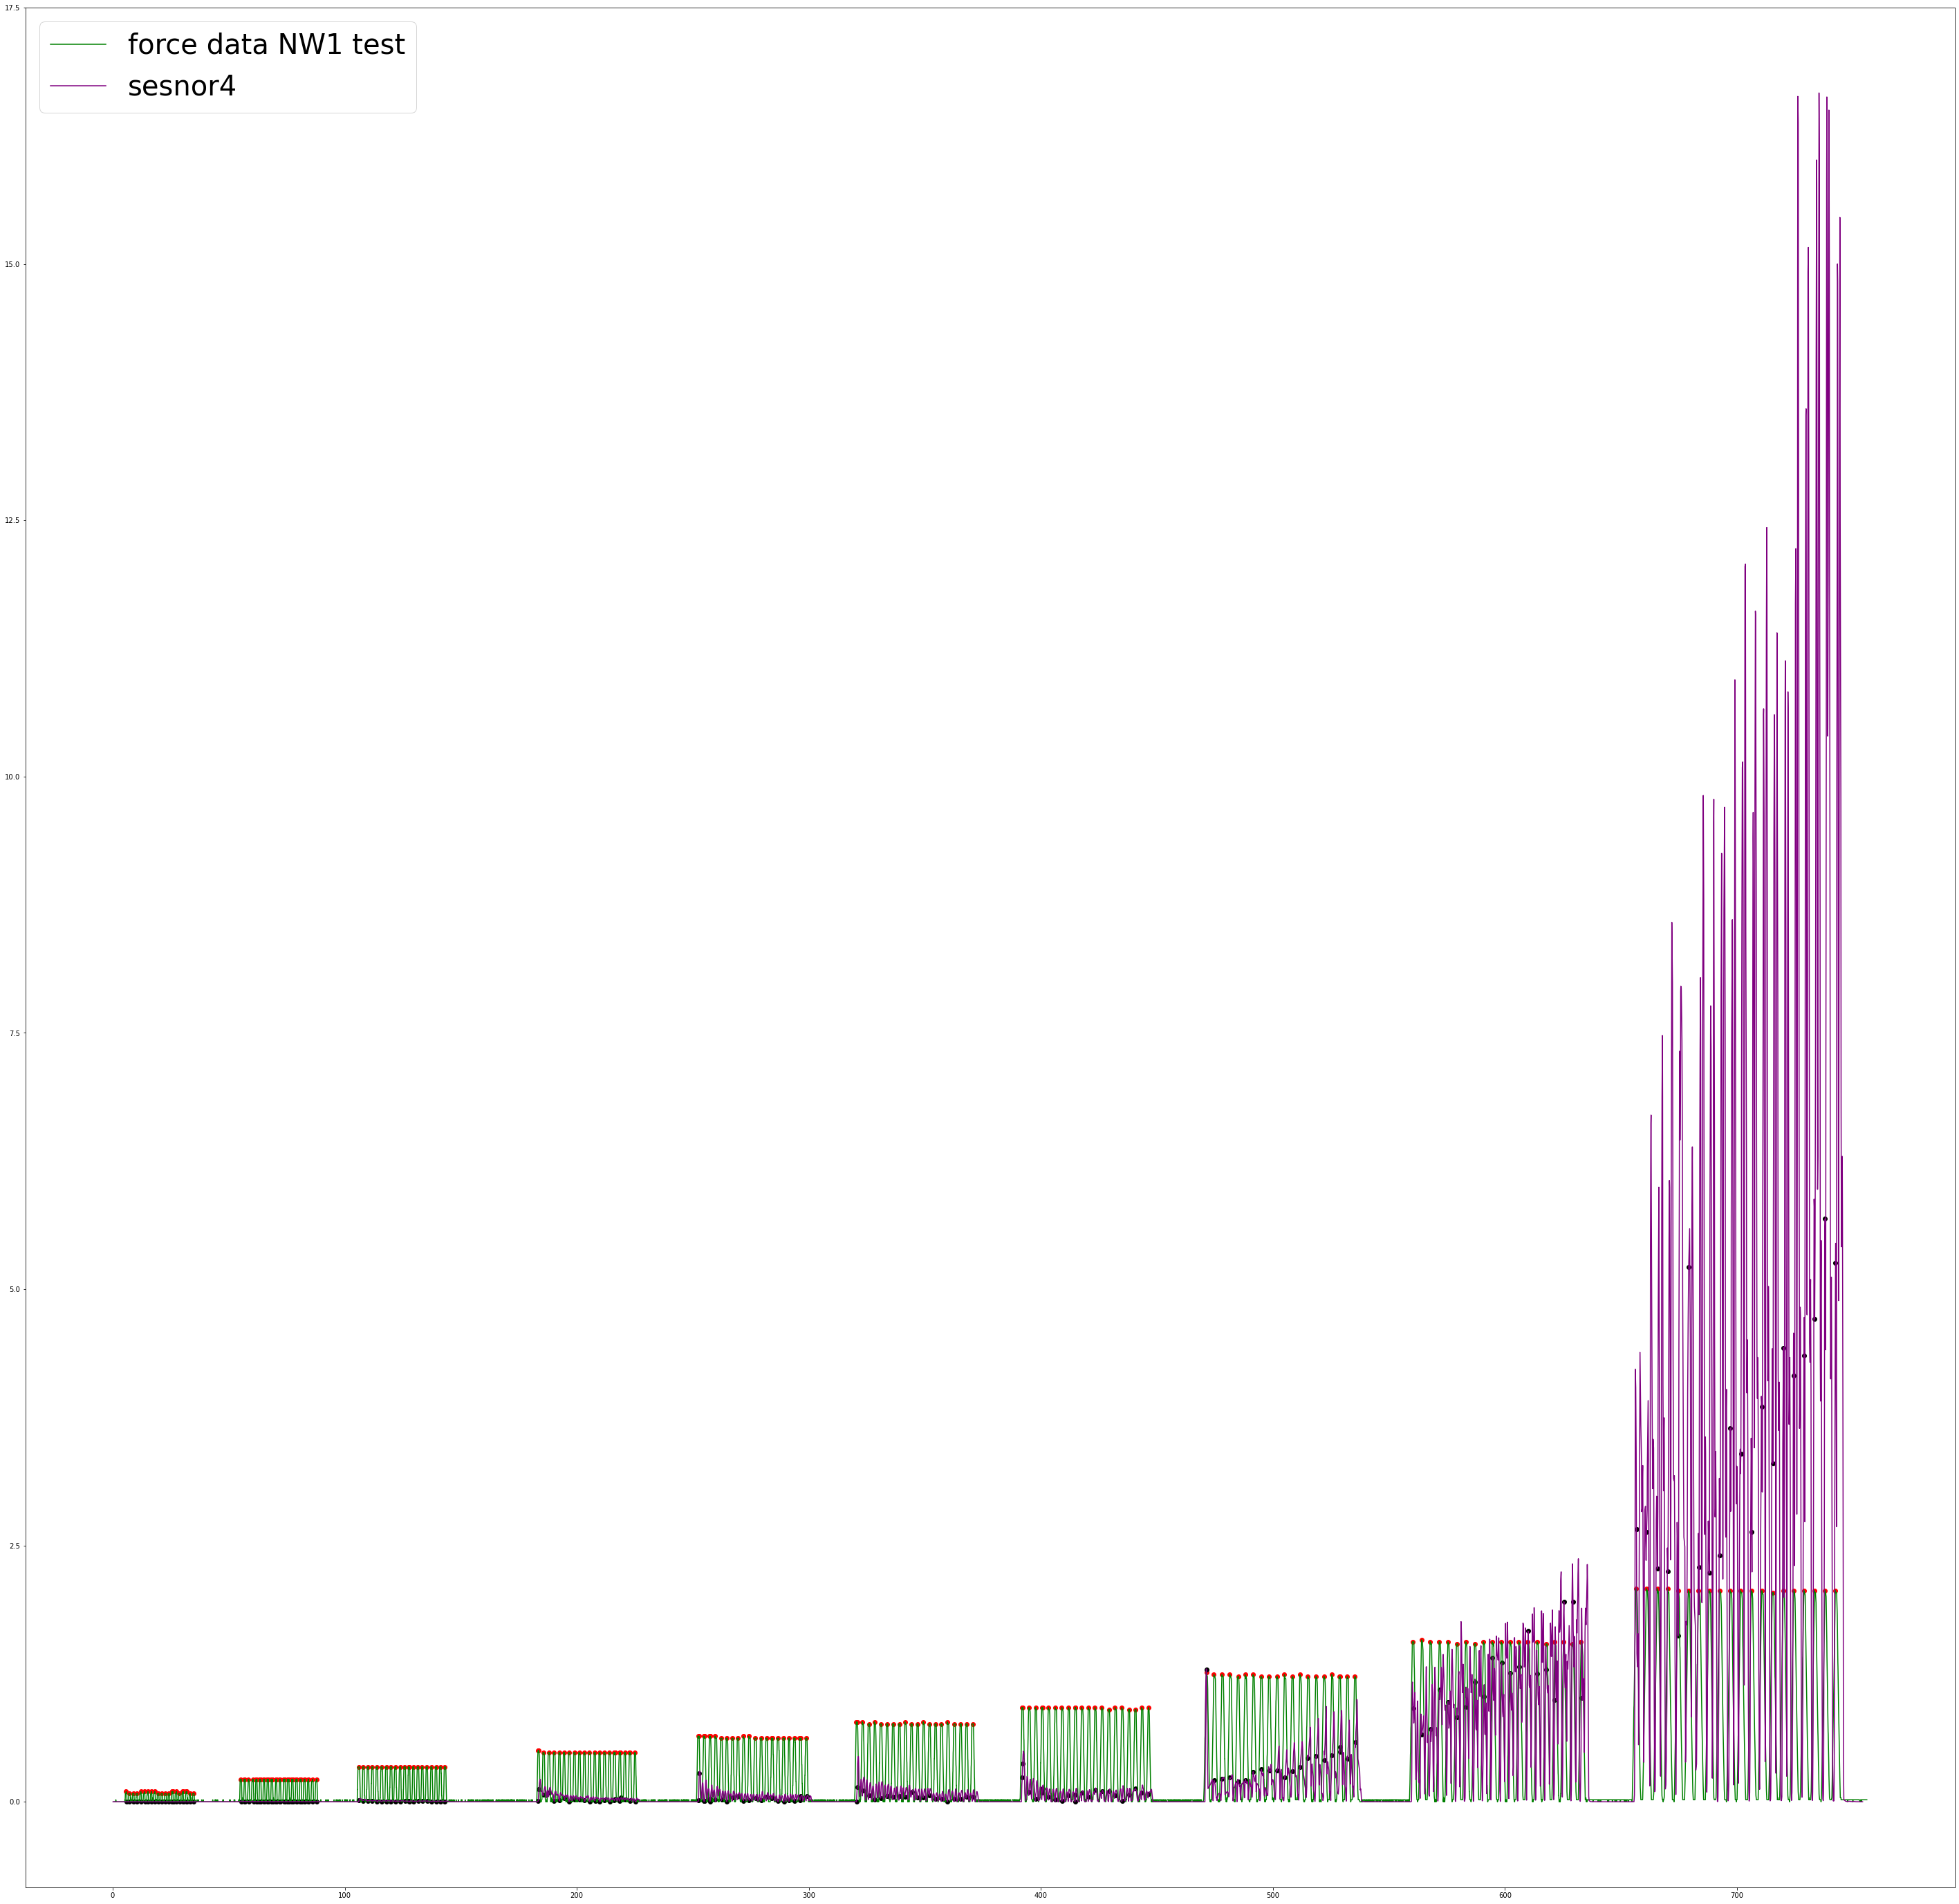

In [12]:
#visualizing and syncing the resistance data for each sensor NW 1- 5 - NW1

plt.figure(figsize=(50, 50))

# plt.plot(NW1["Unnamed: 0"],NW1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NW1["Unnamed: 0"],NW1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NW1["Unnamed: 0"],NW1["s3_d"], color = 'blue', label = 'sesnor3')
#plt.plot(NW1["Unnamed: 0"],NW1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NW1 = x_force_NW1 + 0.5
scaled_NW1 = NW1["Unnamed: 0"]

plt.plot(scaled_x_force_NW1,Load_NW1,color = 'green', label = 'force data NW1 test' )
plt.plot(scaled_NW1,NW1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for NW1")

#finding the peaks

pidx_Load_NW1, _ = find_peaks(Load_NW1,prominence= 0.05 )
peaks_Load_NW1 = Load_NW1[pidx_Load_NW1]
peaks_Ltime_NW1 = scaled_x_force_NW1[pidx_Load_NW1]

plt.scatter(peaks_Ltime_NW1,peaks_Load_NW1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NW1time = []

peaks_Ltime_NW1.reset_index(drop = True, inplace = True)
peaks_Load_NW1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NW1)):
    idx_NW1time.append(bisect.bisect_left(NW1["Unnamed: 0"], peaks_Ltime_NW1[i]))

plt.scatter(NW1["Unnamed: 0"][idx_NW1time],NW1["s4_d"][idx_NW1time],color = 'black')

In [13]:
#Storing the peaks into csv file - NW1
Load_NW1peaks =[]

for i in range(len(peaks_Load_NW1)):
    Load_NW1peaks.append(peaks_Load_NW1[i])
    
content_NW1 = {'R1':NW1["s1_d"][idx_NW1time],
              'R2':NW1["s2_d"][idx_NW1time],
              'R3':NW1["s3_d"][idx_NW1time],
              'R4':NW1["s4_d"][idx_NW1time], 
              'Load': Load_NW1peaks} 

df_NW1 = pd.DataFrame(content_NW1, columns = ['R1','R2','R3','R4','Load'])

df_NW1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NW1.csv',index = False, header = True)

Sensor 4 is more profound for NW2


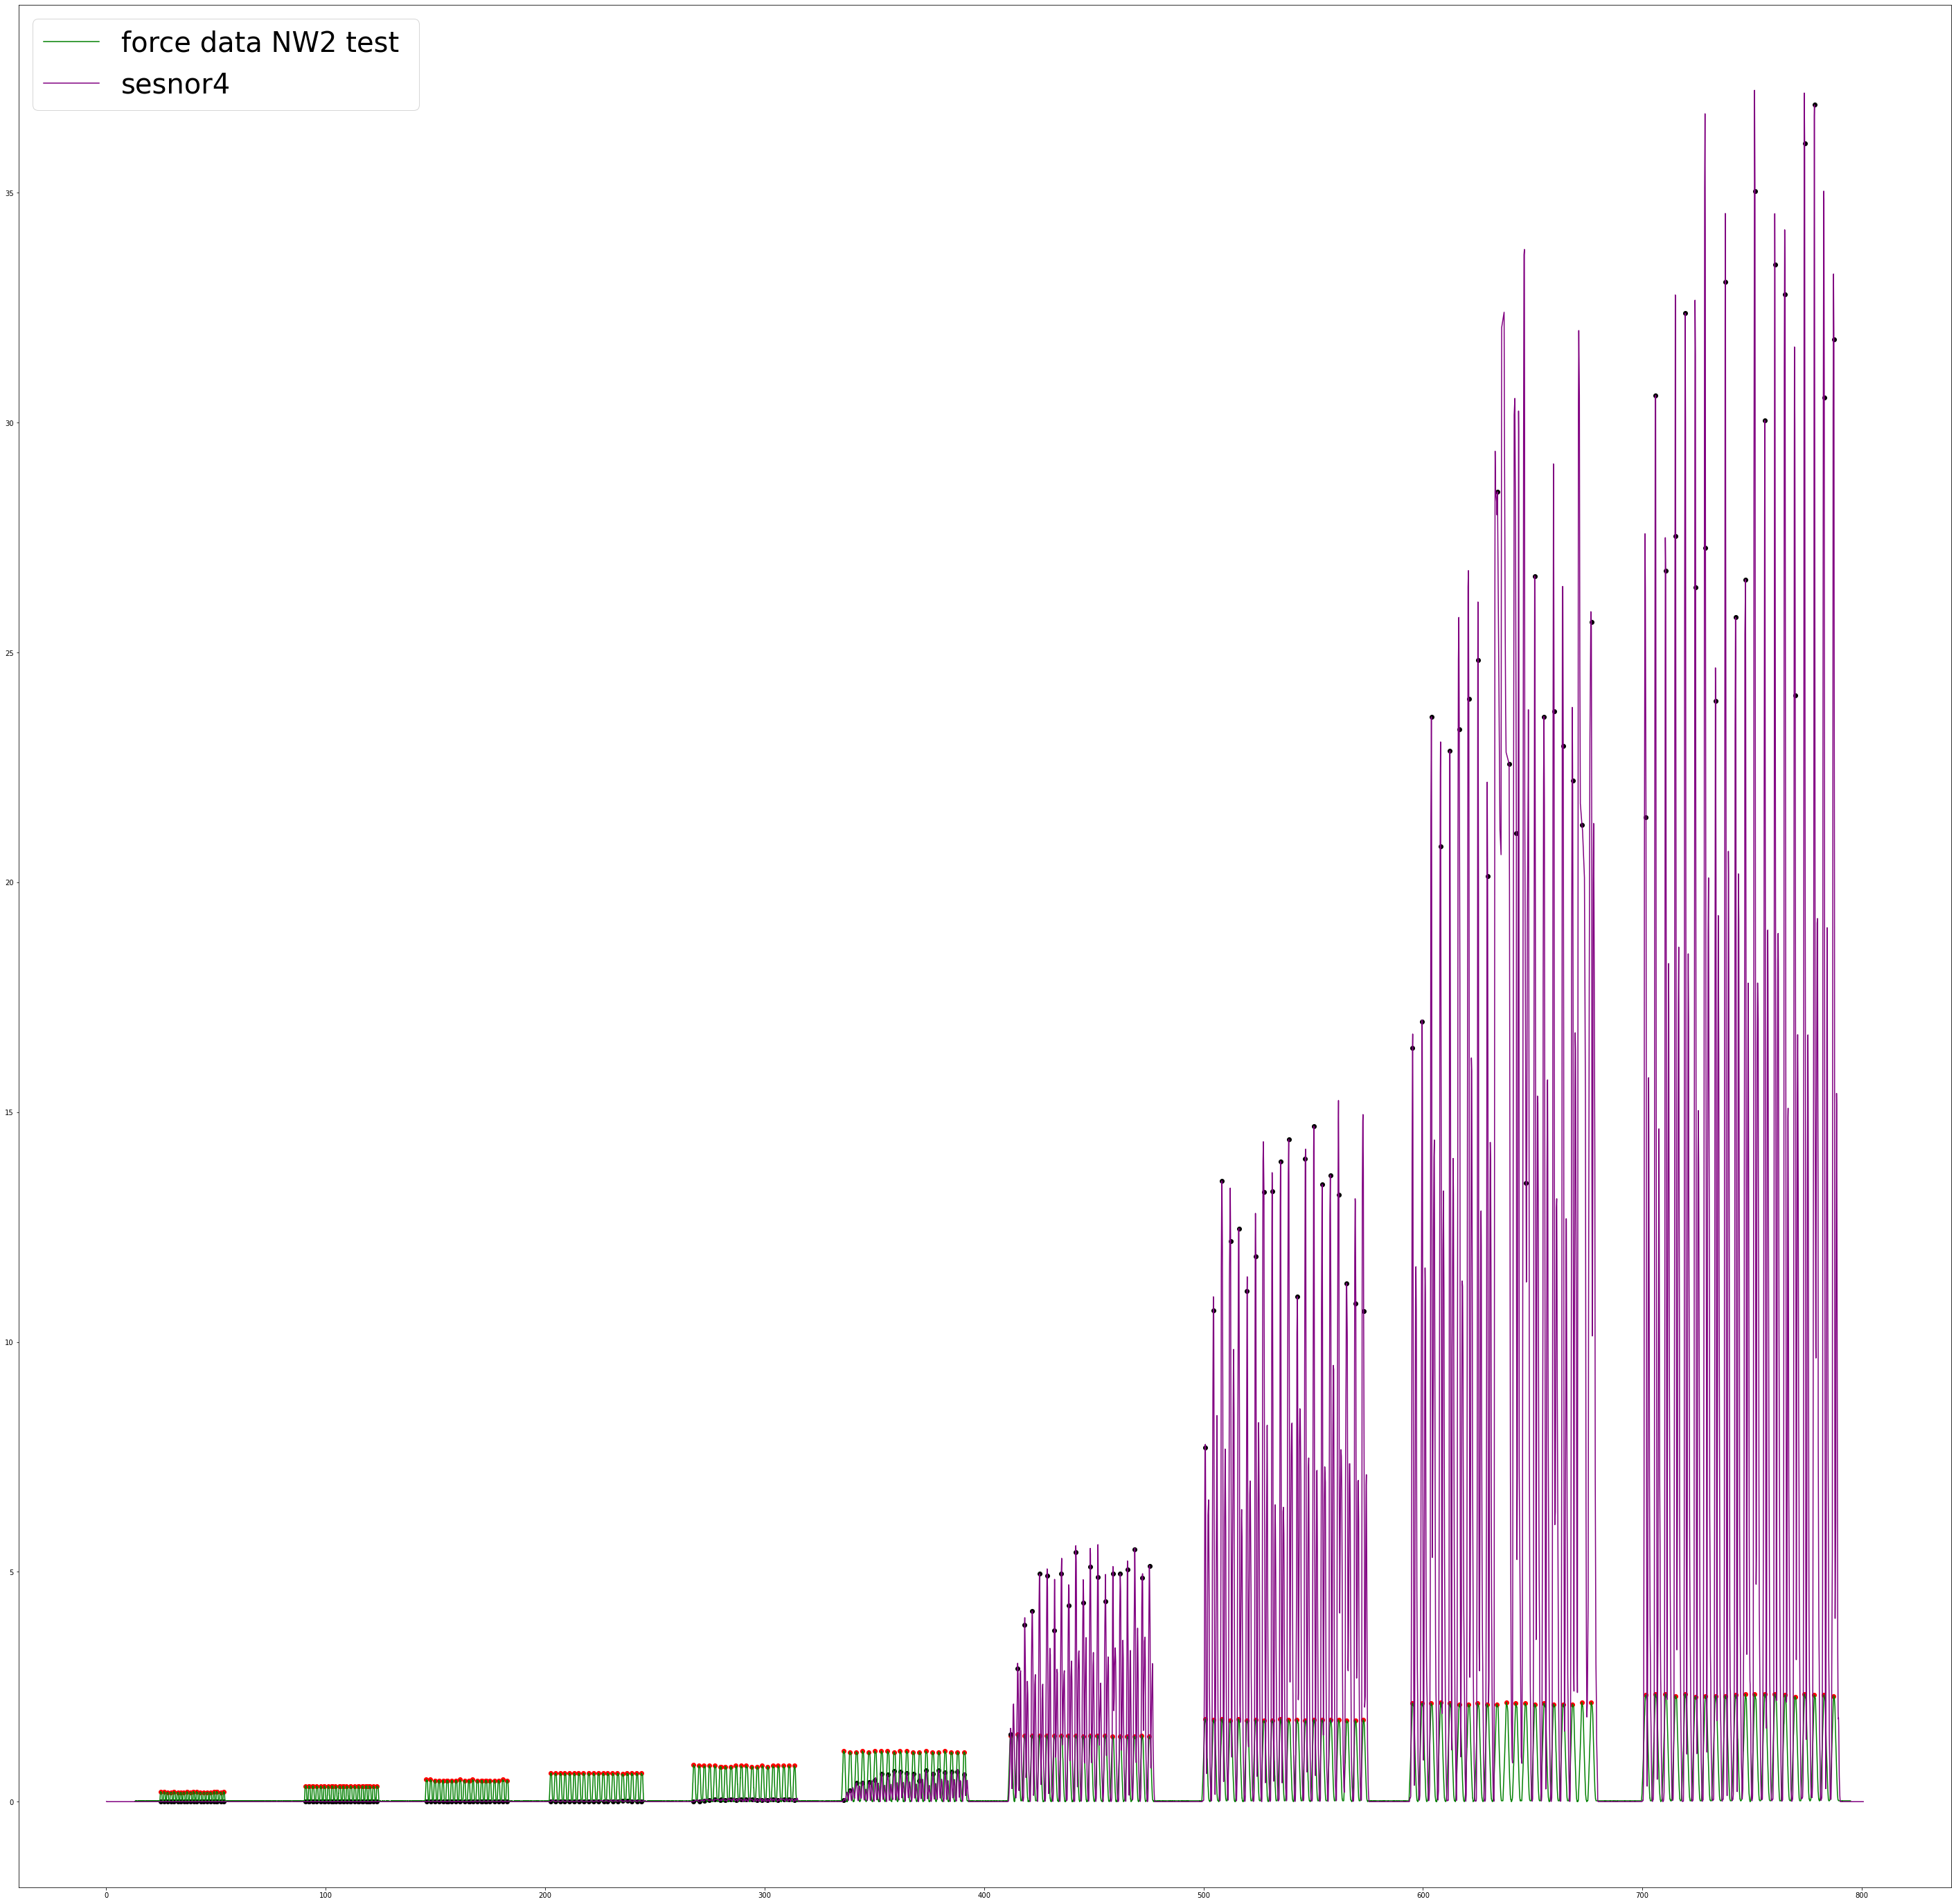

In [20]:
#visualizing and syncing the resistance data for each sensor NW 1- 5 - NW2

plt.figure(figsize=(50, 50))

# plt.plot(NW2["Unnamed: 0"],NW2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NW2["Unnamed: 0"],NW2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NW2["Unnamed: 0"],NW2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NW2["Unnamed: 0"],NW2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NW2 = x_force_NW2 + 13
scaled_NW2 = NW2["Unnamed: 0"]

plt.plot(scaled_x_force_NW2,Load_NW2,color = 'green', label = 'force data NW2 test ' )
plt.plot(scaled_NW2,NW2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NW2")

#finding the peaks

pidx_Load_NW2, _ = find_peaks(Load_NW2,prominence= 0.05 )
peaks_Load_NW2 = Load_NW2[pidx_Load_NW2]
peaks_Ltime_NW2 = scaled_x_force_NW2[pidx_Load_NW2]

plt.scatter(peaks_Ltime_NW2,peaks_Load_NW2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NW2time = []

peaks_Ltime_NW2.reset_index(drop = True, inplace = True)
peaks_Load_NW2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NW2)):
    idx_NW2time.append(bisect.bisect_left(NW2["Unnamed: 0"], peaks_Ltime_NW2[i]))

plt.scatter(NW2["Unnamed: 0"][idx_NW2time],NW2["s4_d"][idx_NW2time],color = 'black')

In [21]:
#Storing the peaks into csv file - NW2
Load_NW2peaks =[]

for i in range(len(peaks_Load_NW2)):
    Load_NW2peaks.append(peaks_Load_NW2[i])
    
content_NW2 = {'R1':NW2["s1_d"][idx_NW2time],
              'R2':NW2["s2_d"][idx_NW2time],
              'R3':NW2["s3_d"][idx_NW2time],
              'R4':NW2["s4_d"][idx_NW2time], 
              'Load': Load_NW2peaks} 

df_NW2 = pd.DataFrame(content_NW2, columns = ['R1','R2','R3','R4','Load'])

df_NW2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NW2.csv',index = False, header = True)

Sensor 4 is more profound for NW3


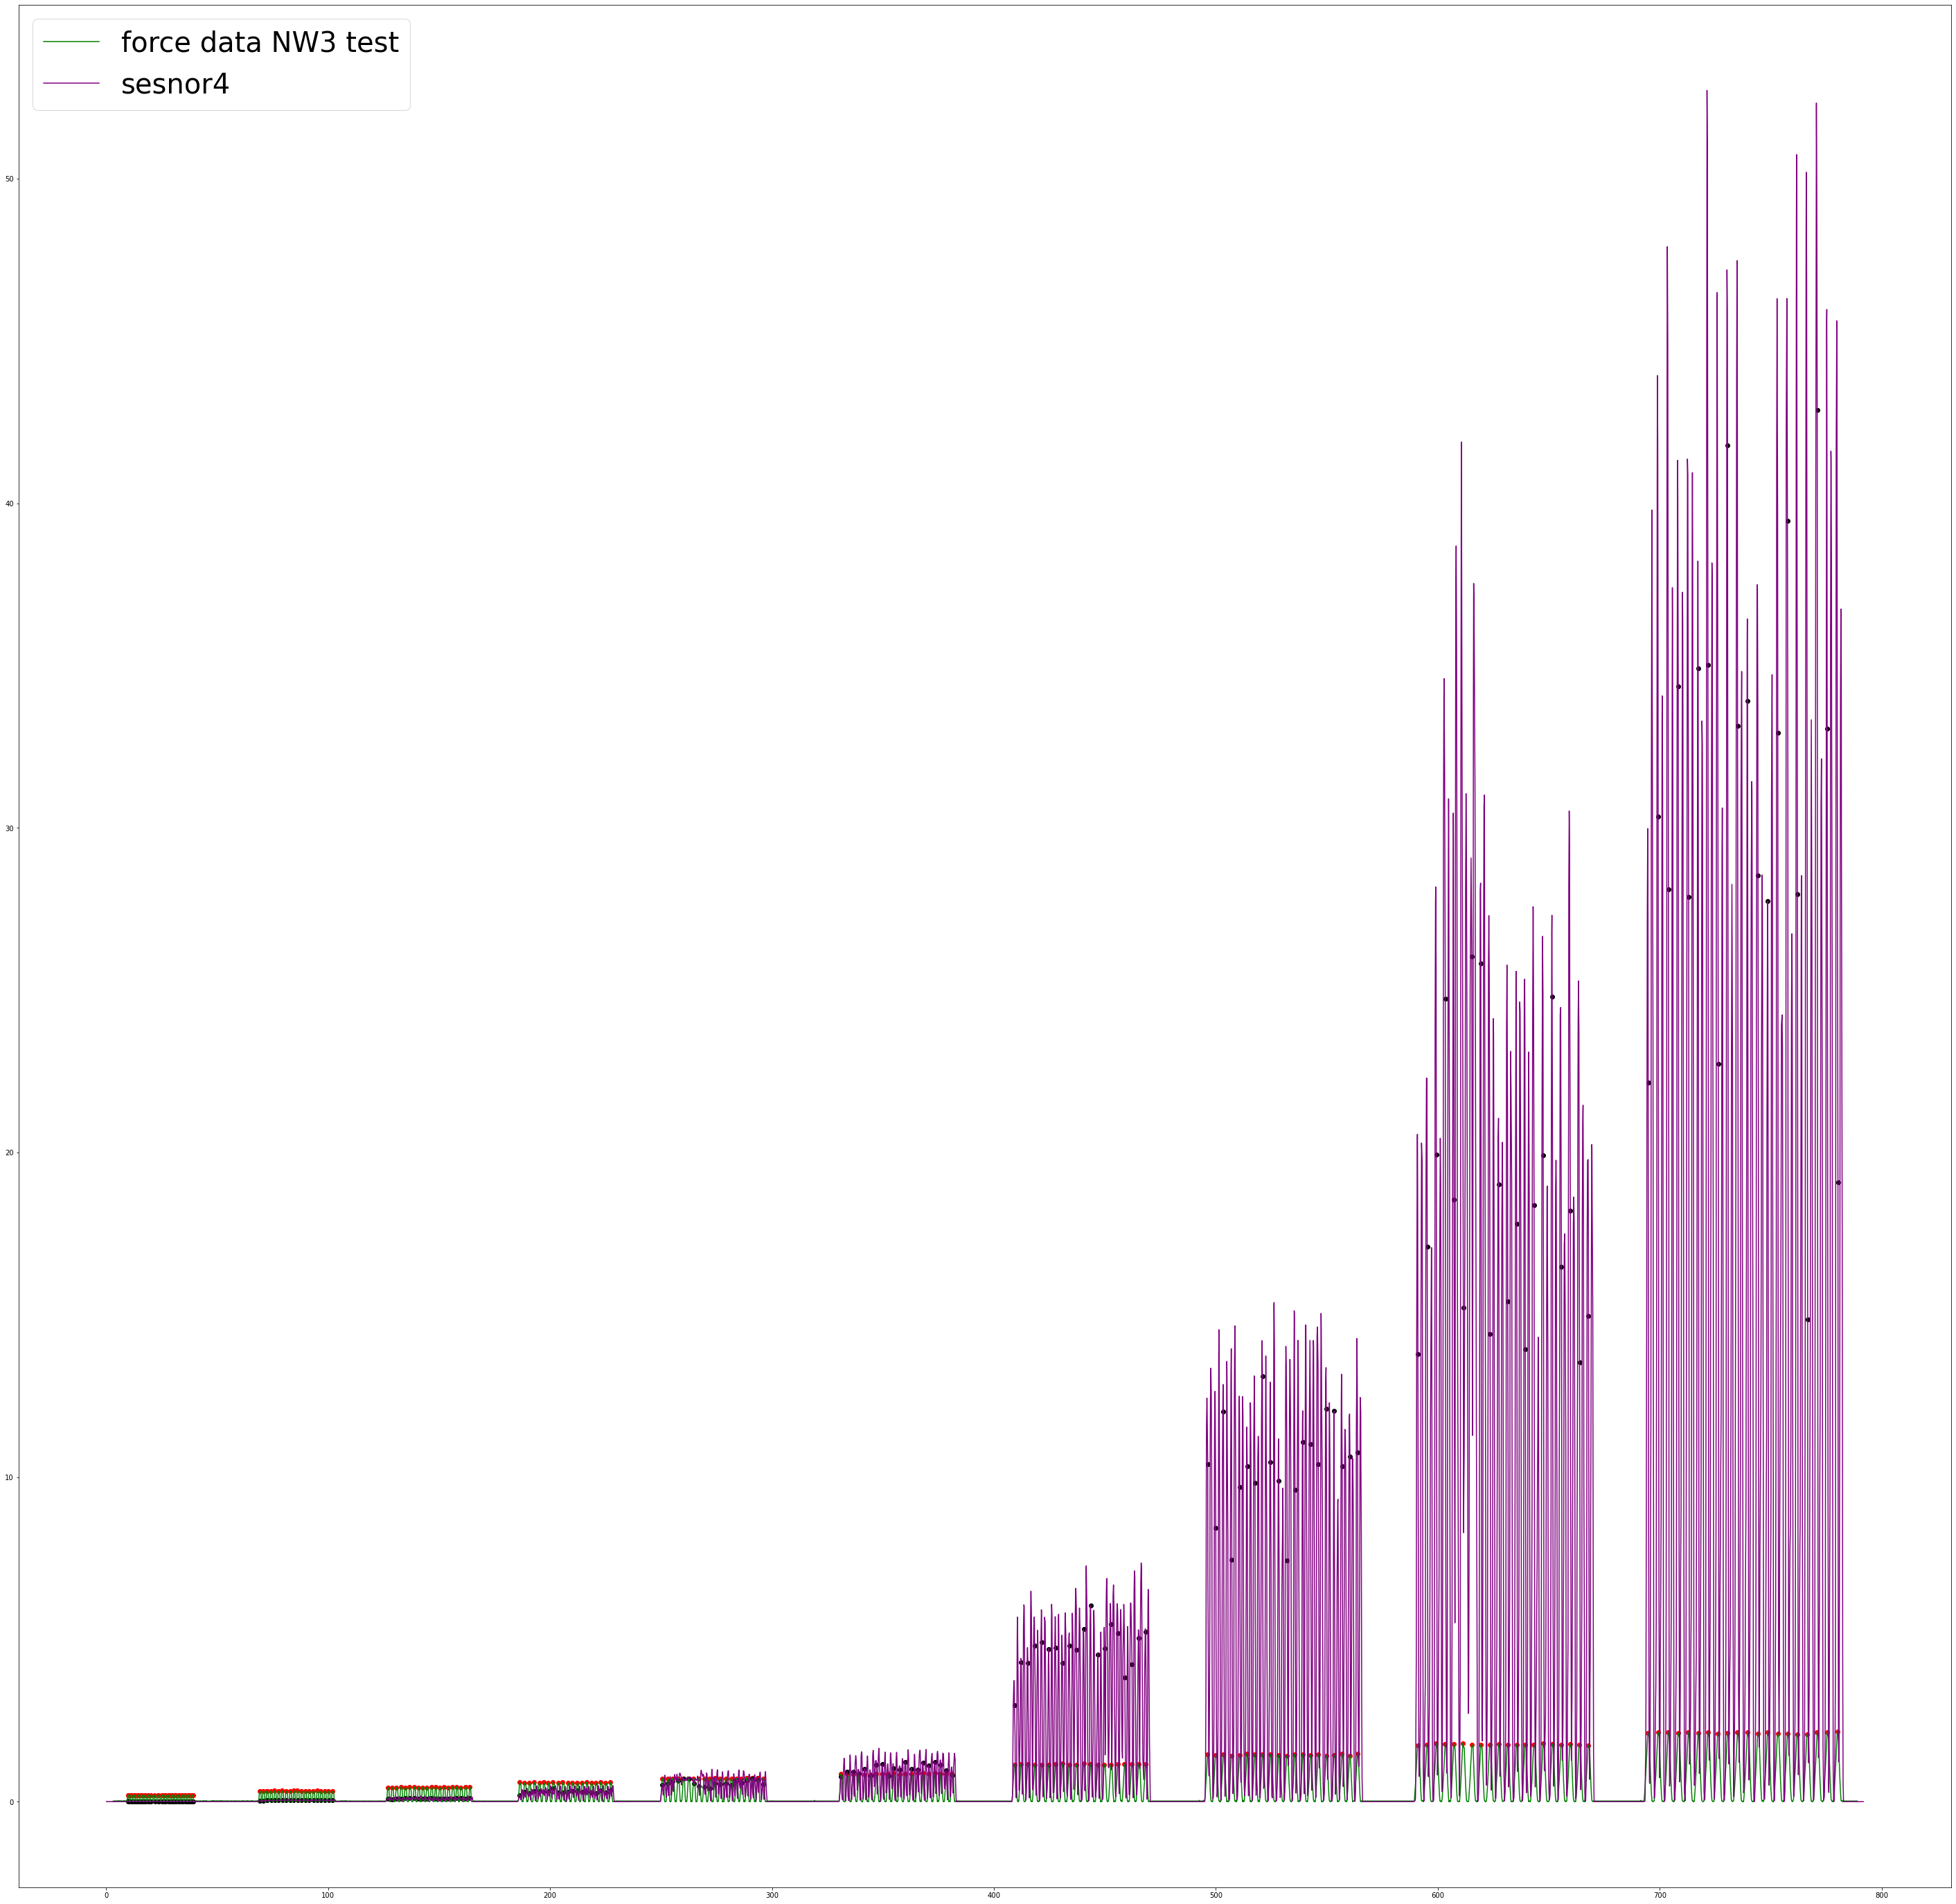

In [24]:
#visualizing and syncing the resistance data for each sensor NW 1- 5 - NW3

plt.figure(figsize=(50, 50))

# plt.plot(NW3["Unnamed: 0"],NW3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NW3["Unnamed: 0"],NW3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NW3["Unnamed: 0"],NW3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NW3["Unnamed: 0"],NW3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NW3 = x_force_NW3 + 3
scaled_NW3 = NW3["Unnamed: 0"]

plt.plot(scaled_x_force_NW3,Load_NW3,color = 'green', label = 'force data NW3 test' )
plt.plot(scaled_NW3,NW3["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for NW3")

#finding the peaks

pidx_Load_NW3, _ = find_peaks(Load_NW3,prominence= 0.05 )
peaks_Load_NW3 = Load_NW3[pidx_Load_NW3]
peaks_Ltime_NW3 = scaled_x_force_NW3[pidx_Load_NW3]

plt.scatter(peaks_Ltime_NW3,peaks_Load_NW3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NW3time = []

peaks_Ltime_NW3.reset_index(drop = True, inplace = True)
peaks_Load_NW3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NW3)):
    idx_NW3time.append(bisect.bisect_left(NW3["Unnamed: 0"], peaks_Ltime_NW3[i]))

plt.scatter(NW3["Unnamed: 0"][idx_NW3time],NW3["s4_d"][idx_NW3time],color = 'black')

In [25]:
#Storing the peaks into csv file - NW3
Load_NW3peaks =[]

for i in range(len(peaks_Load_NW3)):
    Load_NW3peaks.append(peaks_Load_NW3[i])
    
content_NW3 = {'R1':NW3["s1_d"][idx_NW3time],
              'R2':NW3["s2_d"][idx_NW3time],
              'R3':NW3["s3_d"][idx_NW3time],
              'R4':NW3["s4_d"][idx_NW3time], 
              'Load': Load_NW3peaks} 

df_NW3 = pd.DataFrame(content_NW3, columns = ['R1','R2','R3','R4','Load'])

df_NW3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NW3.csv',index = False, header = True)

Sensor 4 is more profound for NW4


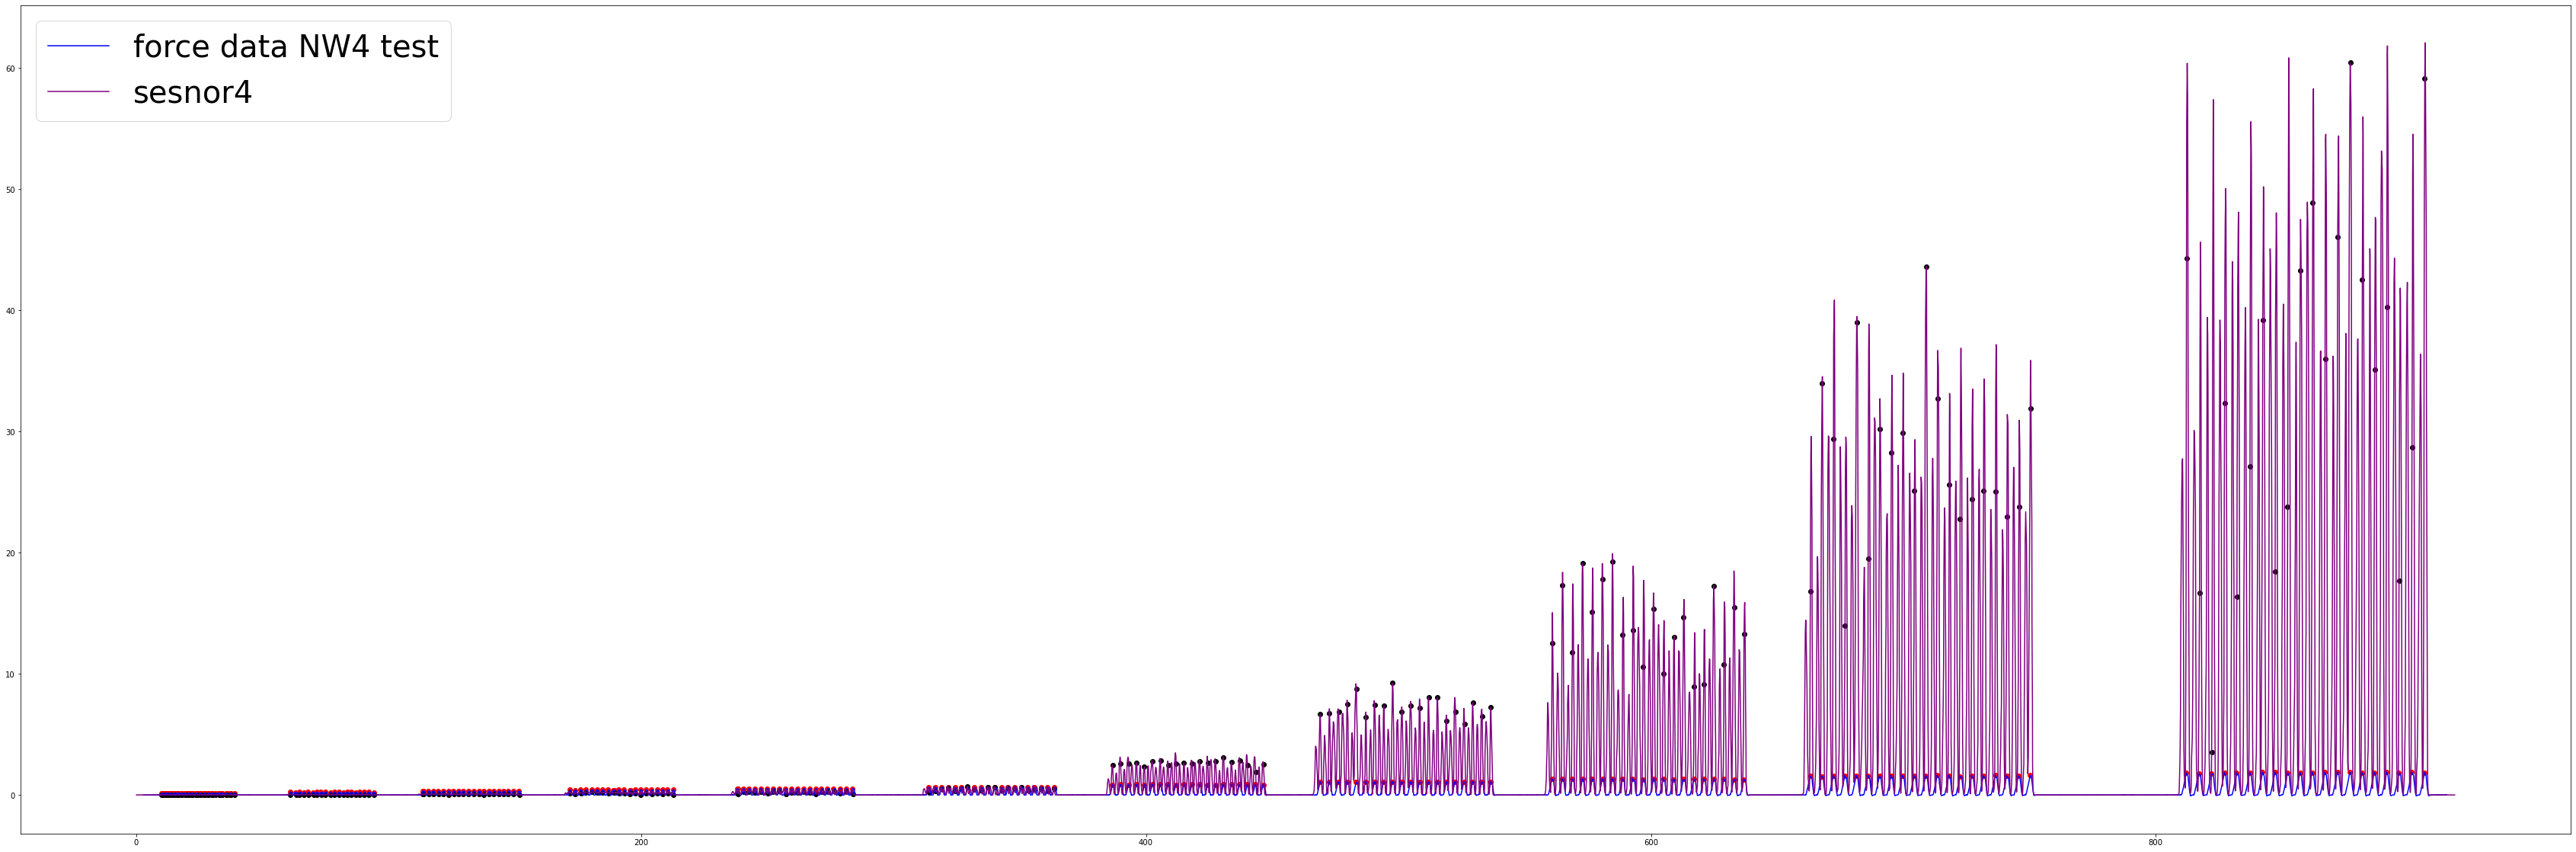

In [33]:
#visualizing and syncing the resistance data for each sensor NW 1- 5 - NW4

plt.figure(figsize=(60, 20))

# plt.plot(NW4["Unnamed: 0"],NW4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NW4["Unnamed: 0"],NW4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NW4["Unnamed: 0"],NW4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NW4["Unnamed: 0"],NW4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NW4 = x_force_NW4 + 3
scaled_NW4 = NW4["Unnamed: 0"]

plt.plot(scaled_x_force_NW4,Load_NW4,color = 'blue', label = 'force data NW4 test' )
plt.plot(scaled_NW4,NW4["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NW4")

#finding the peaks

pidx_Load_NW4, _ = find_peaks(Load_NW4,prominence= 0.05 )
peaks_Load_NW4 = Load_NW4[pidx_Load_NW4]
peaks_Ltime_NW4 = scaled_x_force_NW4[pidx_Load_NW4]

plt.scatter(peaks_Ltime_NW4,peaks_Load_NW4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NW4time = []

peaks_Ltime_NW4.reset_index(drop = True, inplace = True)
peaks_Load_NW4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NW4)):
    idx_NW4time.append(bisect.bisect_left(NW4["Unnamed: 0"], peaks_Ltime_NW4[i]))

plt.scatter(NW4["Unnamed: 0"][idx_NW4time],NW4["s4_d"][idx_NW4time],color = 'black')

In [34]:
#Storing the peaks into csv file - NW4
Load_NW4peaks =[]

for i in range(len(peaks_Load_NW4)):
    Load_NW4peaks.append(peaks_Load_NW4[i])
    
content_NW4 = {'R1':NW4["s1_d"][idx_NW4time],
              'R2':NW4["s2_d"][idx_NW4time],
              'R3':NW4["s3_d"][idx_NW4time],
              'R4':NW4["s4_d"][idx_NW4time], 
              'Load': Load_NW4peaks} 

df_NW4 = pd.DataFrame(content_NW4, columns = ['R1','R2','R3','R4','Load'])

df_NW4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NW4.csv',index = False, header = True)

Sensor 4 is more profound for NW5


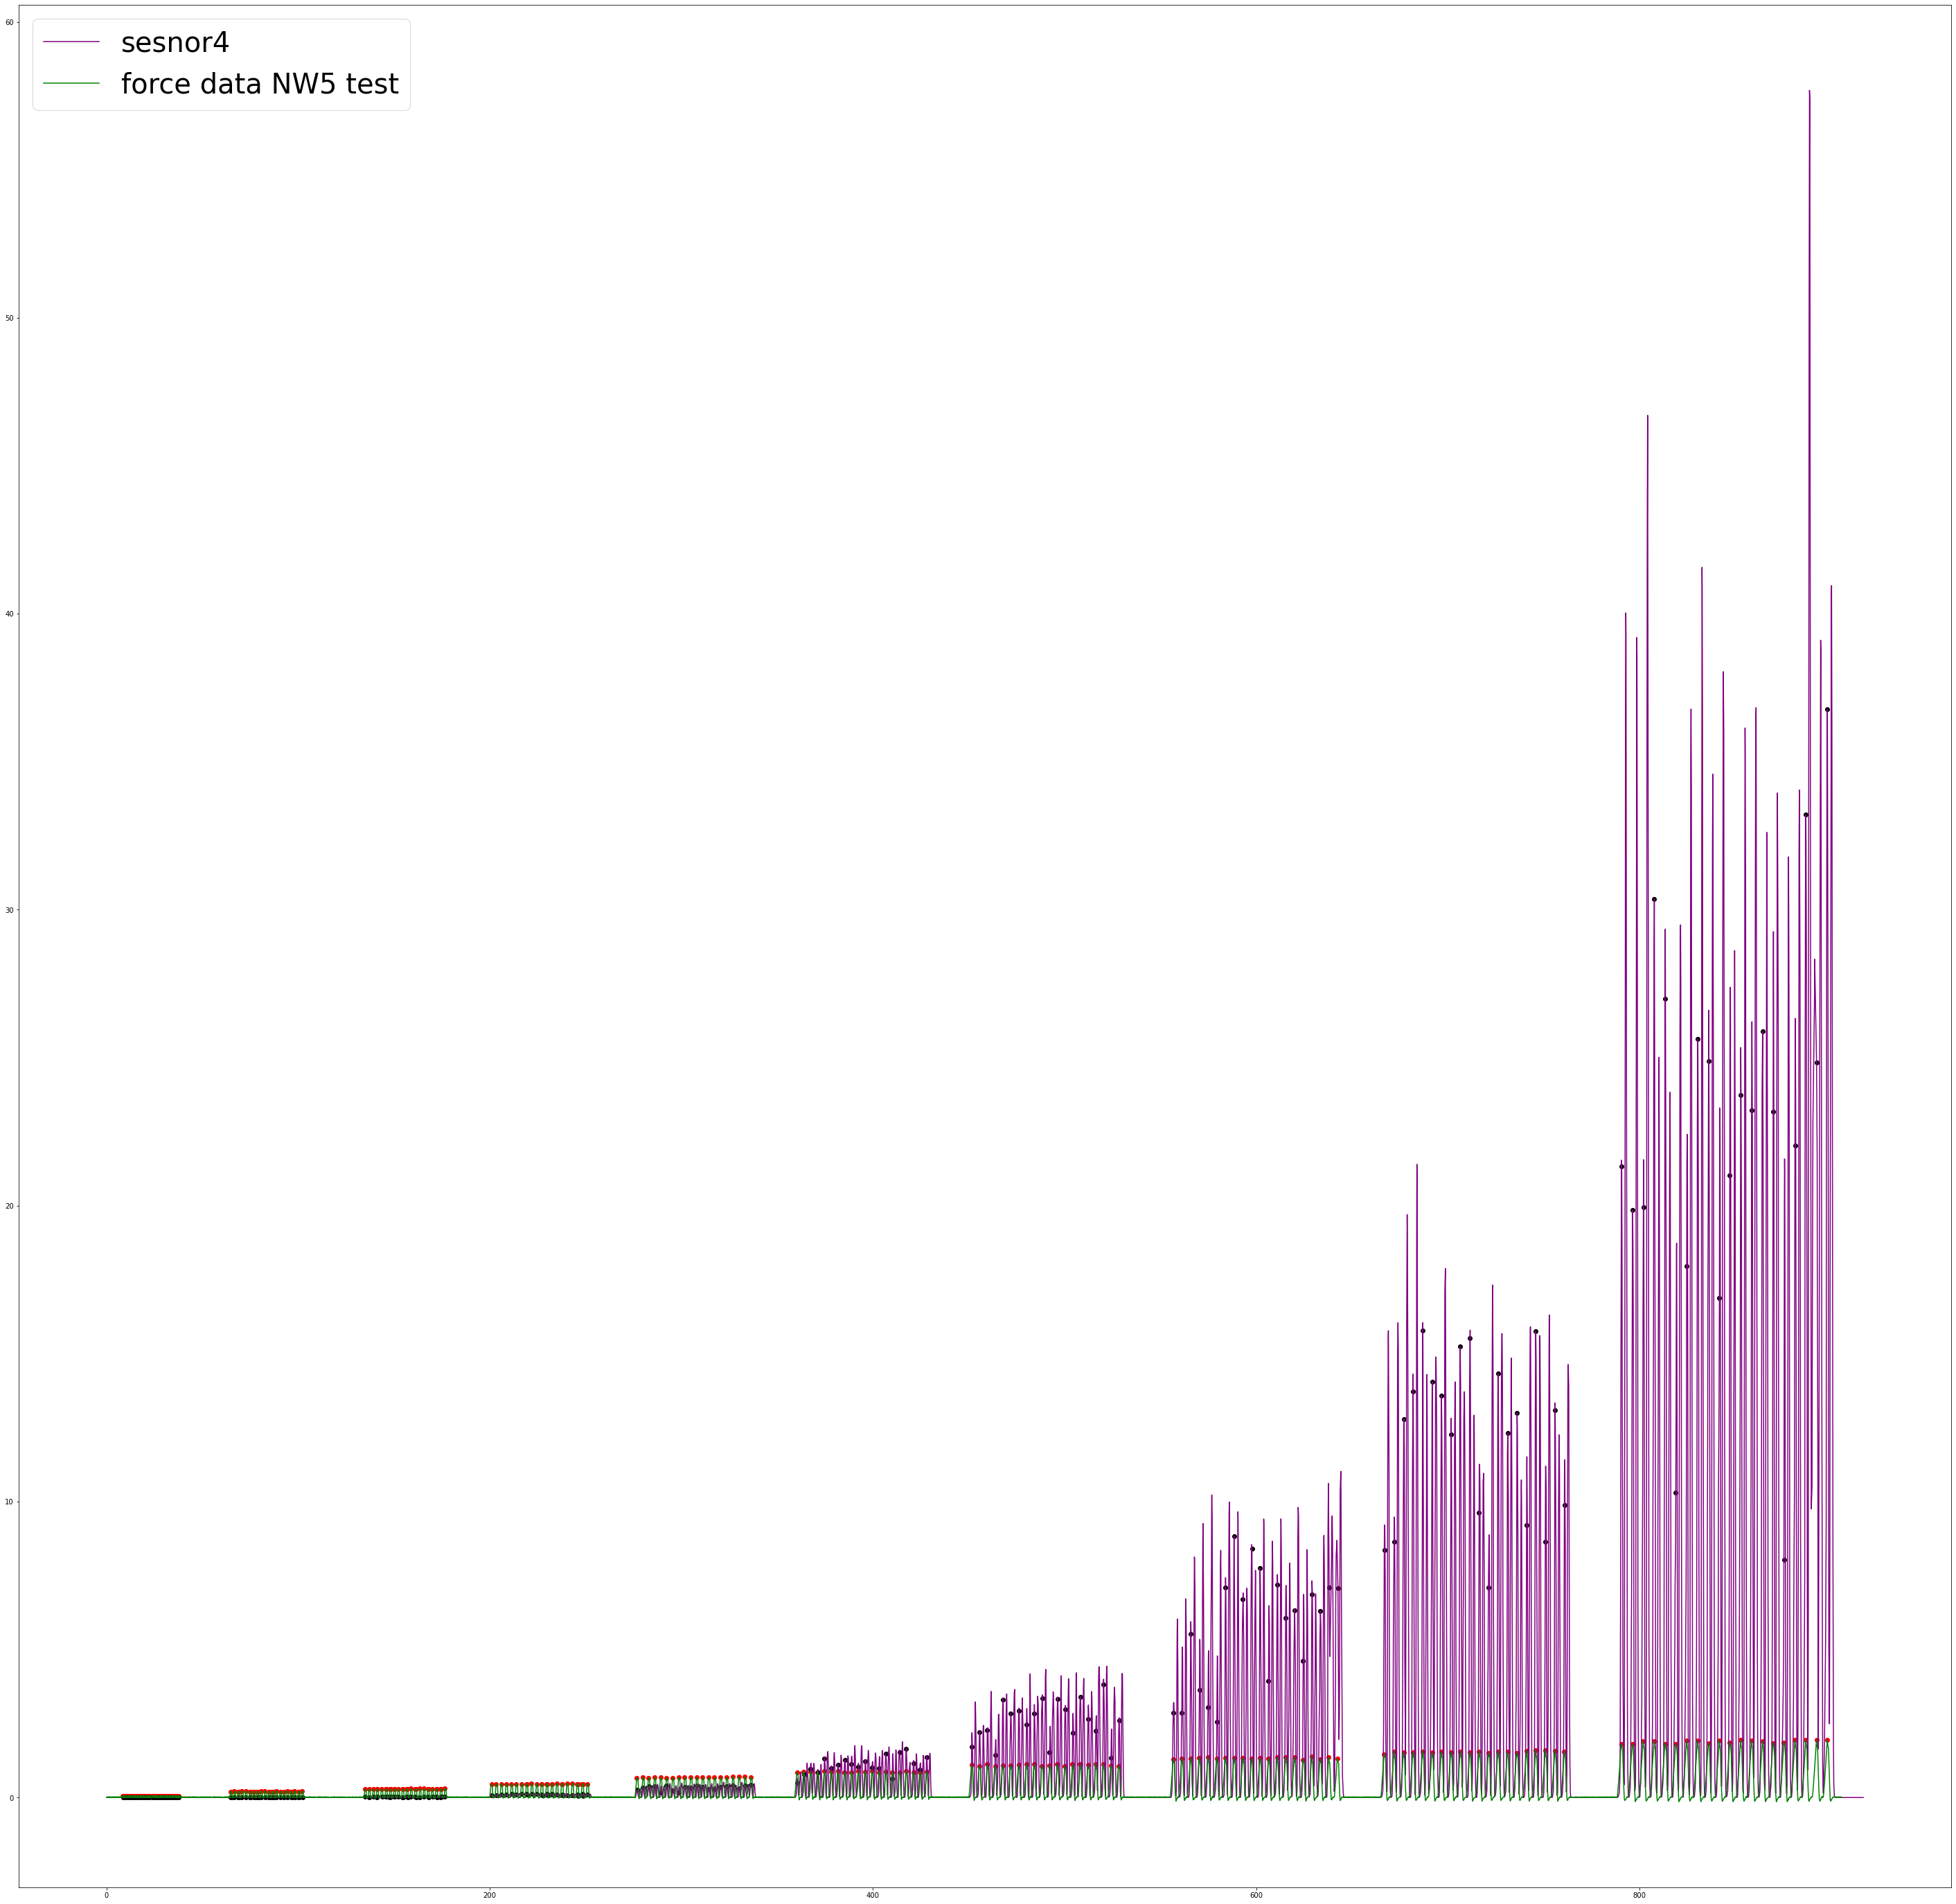

In [35]:
#visualizing and syncing the resistance data for each sensor NW 1- 5 - NW5

plt.figure(figsize=(50, 50))

# plt.plot(NW5["Unnamed: 0"],NW5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NW5["Unnamed: 0"],NW5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NW5["Unnamed: 0"],NW5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NW5["Unnamed: 0"],NW5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NW5 = x_force_NW5 

scaled_NW5 = NW5["Unnamed: 0"]

plt.plot(scaled_NW5,NW5["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NW5,Load_NW5,color = 'green', label = 'force data NW5 test' )


plt.legend(fontsize=40)

print("Sensor 4 is more profound for NW5")

#finding the peaks

pidx_Load_NW5, _ = find_peaks(Load_NW5,prominence= 0.05 )
peaks_Load_NW5 = Load_NW5[pidx_Load_NW5]
peaks_Ltime_NW5 = scaled_x_force_NW5[pidx_Load_NW5]

plt.scatter(peaks_Ltime_NW5,peaks_Load_NW5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NW5time = []

peaks_Ltime_NW5.reset_index(drop = True, inplace = True)
peaks_Load_NW5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NW5)):
    idx_NW5time.append(bisect.bisect_left(NW5["Unnamed: 0"], peaks_Ltime_NW5[i]))

plt.scatter(NW5["Unnamed: 0"][idx_NW5time],NW5["s4_d"][idx_NW5time],color = 'black')

In [36]:
#Storing the peaks into csv file - NW5
Load_NW5peaks =[]

for i in range(len(peaks_Load_NW5)):
    Load_NW5peaks.append(peaks_Load_NW5[i])
    
content_NW5 = {'R1':NW5["s1_d"][idx_NW5time],
              'R2':NW5["s2_d"][idx_NW5time],
              'R3':NW5["s3_d"][idx_NW5time],
              'R4':NW5["s4_d"][idx_NW5time], 
              'Load': Load_NW5peaks} 

df_NW5 = pd.DataFrame(content_NW5, columns = ['R1','R2','R3','R4','Load'])

df_NW5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NW5.csv',index = False, header = True)